<a href="https://colab.research.google.com/github/amitsahoo11071989/22Jan2024/blob/main/credit_card_customer_card_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# prompt: import pandas, numpy, tensorflow, keras

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

#from tensorflow.keras import Sequential, Dense


In [155]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [156]:
df.drop(["RowNumber",  "CustomerId", "Surname"], axis=1, inplace=True)

In [157]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [159]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [160]:
gender_dict = {"Male": 1, "Female":0}
df["Gender"] = df["Gender"].map(gender_dict)

In [161]:
df["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [162]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
ohe.fit(df[["Geography"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [163]:
encoded_columns = list(ohe.get_feature_names_out())

In [164]:
df[encoded_columns] = ohe.transform(df[["Geography"]])

In [165]:
df.drop(["Geography"], axis = 1, inplace=True)

In [166]:
df.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,0.0,0.0


In [167]:
y=df["Exited"]
X = df.drop(["Exited"], axis = 1)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
import tensorflow
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [171]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [172]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 5)                 60        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [174]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7330 - accuracy: 0.5719 - val_loss: 0.6385 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7972 - val_loss: 0.5093 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7972 - val_loss: 0.4946 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7972 - val_loss: 0.4821 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7973 - val_loss: 0.4679 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7991 - val_loss: 0.4599 - val_accuracy: 0.8050
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8027 - val_loss: 0.4537 - val_accuracy: 0.8100

In [175]:
model.layers[0].get_weights()

[array([[-4.20077844e-03,  4.86970156e-01,  1.47897571e-01,
         -4.74062599e-02,  6.20001614e-01,  3.60702455e-01,
         -9.85218957e-02,  3.61327678e-01,  3.07730902e-02,
          1.02427460e-01, -3.45778093e-02],
        [ 5.51791526e-02,  2.59513021e-01,  9.90349576e-02,
          3.39644372e-01, -3.38897437e-01, -1.24665171e-01,
         -7.25229606e-02,  8.78918320e-02,  1.81620277e-03,
          4.70725968e-02,  9.95708257e-02],
        [-1.89139783e-01, -2.85252333e-01, -2.66455203e-01,
          1.52574405e-01, -4.21488047e-01, -4.55625132e-02,
          1.06339887e-01, -2.68316299e-01, -3.64032388e-01,
         -1.69267178e+00, -4.24516022e-01],
        [ 4.30253178e-01,  3.03847715e-02, -2.40324169e-01,
          2.36539558e-01,  3.15102935e-01,  1.14194095e-01,
         -5.45690730e-02,  1.60488725e-01,  2.10387483e-02,
         -6.59955386e-03,  7.05155879e-02],
        [-1.29187629e-01, -5.58758259e-01, -8.18209201e-02,
         -3.04300785e-01, -4.93101887e-02, -

In [176]:
y_pred = model.predict(X_test)
results = np.where(y_pred>0.5, 1, 0)

63/63 [==============================] - 0s 1ms/step


In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, results)

0.866

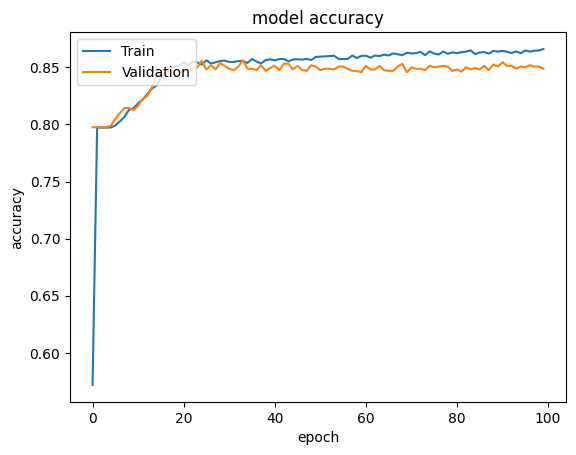

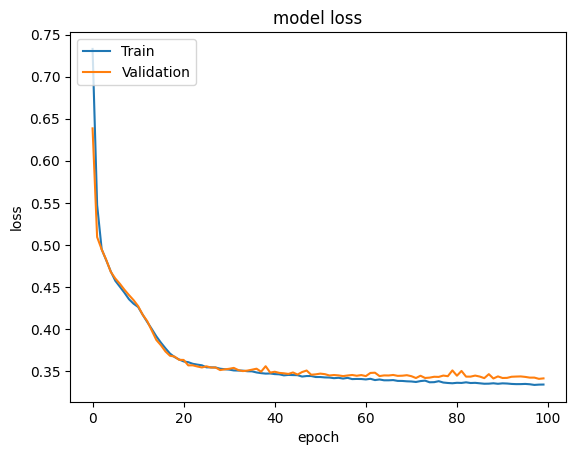

In [178]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()